# Centrosymmetry parameter


Centrosymmetry parameter (CSP) was introduced by [*Kelchner et al.*](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.58.11085) to identify defects in crystals. The parameter measures the loss of local symmetry. For an atom with $N$ nearest neighbors, the parameter is given by,

$$
\mathrm{CSP} = \sum_{i=1}^{N/2} \big | \textbf{r}_i + \textbf{r}_{i+N/2} \big |^2
$$

$\textbf{r}_i$ and $\textbf{r}_{i+N/2}$ are vectors from the central atom to two opposite pairs of neighbors. There are two main methods to identify the opposite pairs of neighbors as described in [this publication](https://arxiv.org/abs/2003.08879). Pyscal uses the first approach called [*Greedy Edge Selection*](https://iopscience.iop.org/article/10.1088/0965-0393/20/4/045021/meta)(GES) and is implemented in [LAMMPS](https://lammps.sandia.gov/) and [Ovito](https://www.ovito.org/). GES algorithm calculates a weight $w_{ij} = |\textbf{r}_i + \textbf{r}_j|$ for all combinations of neighbors around an atom and calculates CSP over the smallest $N/2$ weights.  

A centrosymmetry parameter calculation using GES algorithm can be carried out as follows. First we can try a perfect crystal.


In [1]:
from pyscal3 import System
import matplotlib.pyplot as plt

In [2]:
sys = System.create.lattice.fcc(lattice_constant=4.0, repetitions=(3,3,3))

In [3]:
csm = sys.calculate.centrosymmetry(nmax = 12)

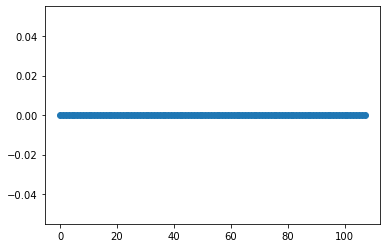

In [4]:
plt.plot(csm, 'o')

You can see all values are zero, as expected. Now lets add some noise to the structure and see how the centrosymmetry parameter changes.

In [5]:
sys = System.create.lattice.fcc(lattice_constant=4.0, repetitions=(3,3,3), noise=0.1)

In [8]:
csm = sys.calculate.centrosymmetry(nmax = 12)

/home/menon/miniconda3/envs/pyscal-test/lib/python3.10/site-packages/pyscal3/atoms.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dict.__setitem__(self, key, np.array(val))


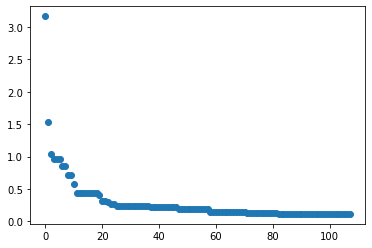

In [9]:
plt.plot(csm, 'o')

The centrosymmetry parameter shows a distribution, owing to the thermal vibrations.

`nmax` parameter specifies the number of nearest neighbors to be considered for the calculation of CSP. If bcc structure is used, this should be changed to either 8 or 14.